In [ ]:
import pandas as pd
import numpy as np
import datetime

#download data, organize into arrays

df = pd.read_csv("mly2275.csv", comment='#')
#print(df.head())

X1=df.iloc[:, 0]
X2=df.iloc[:, 1]

#making X an array of dates 
X=[]
for i in range(np.size(X1, 0)):
    X.append(datetime.date(X1[i], X2[i], 1))
X=np.array(X)

y1=df.iloc[:, 2]
y2=df.iloc[:, 3]
y3=df.iloc[:, 4]
y4=df.iloc[:, 5]
y5=df.iloc[:, 6]
y6=df.iloc[:, 7]
y7=df.iloc[:, 8] 
y8=df.iloc[:, 9]
y9=df.iloc[:, 10]
y10=df.iloc[:, 11]

print(df.dtypes) #some of our columns came out as 'object' (string) --> we'll have to fix that
#                --> where the data's missing, use average of 2 surrounding points It's not perfect, but should be sufficient

for i in range(np.size(y7, 0)):
    if y7[i]=='None':
        y7[i]=(float(y7[i-1])+float(y7[i+1]))/2
y7=y7.astype(float)
for i in range(np.size(y8, 0)):
    if y8[i]=='None':
        y8[i]=(float(y8[i-1])+float(y8[i+1]))/2
y8=y8.astype(float)
for i in range(np.size(y9, 0)):
    if y9[i]=='None':
        y9[i]=(float(y9[i-1])+float(y9[i+1]))/2
y9=y9.astype(float)
for i in range(np.size(y10, 0)):
    if y10[i]=='None':
        y10[i]=None
y10=y10.astype(float)

#we're not including hours of sun in our data, because it's missing for the past decade
y=np.column_stack((y1, y2, y3, y4, y5, y6, y7, y8, y9))

In [ ]:

import matplotlib.pyplot as plt

#timeline - each variable on its own

f=plt.figure(figsize=(10,9))
f.add_subplot(10, 1, 1)
plt.plot(X, y1, color='orange', label='mean temp')
f.add_subplot(10, 1, 2)
plt.plot(X, y2, color='red', label='max temp')
f.add_subplot(10, 1, 3)
plt.plot(X, y3, color='blue', label='min temp')
f.add_subplot(10, 1, 4)
plt.plot(X, y4, color='red',linestyle='dashed', label='mean max temp')
f.add_subplot(10, 1, 5)
plt.plot(X, y5, color='blue',linestyle='dashed', label='mean min temp')
f.add_subplot(10, 1, 6)
plt.plot(X, y6, color='lightsteelblue', label='rain')
f.add_subplot(10, 1, 7)
plt.plot(X, y7, color='green', label='grass mean temp')
f.add_subplot(10, 1, 8)
plt.plot(X, y8, color='plum', label='wind')
f.add_subplot(10, 1, 9)
plt.plot(X, y9, color='purple', label='highest gust')
f.add_subplot(10, 1, 10)
plt.plot(X, y10, color='gold', label='sun') #note that sun data disappears around 2010 - 2015
f.legend()
plt.show()

#last 30 yrs - comparing variables that seem related --> slice [612:None]
f=plt.figure(figsize=(10,9))
f.add_subplot(4, 1, 1)
plt.plot(X[612:None], y1[612:None], color='orange', label='mean temp')
plt.plot(X[612:None], y2[612:None], color='red', label='max temp')
plt.plot(X[612:None], y3[612:None], color='blue', label='min temp')
plt.legend()
f.add_subplot(4, 1, 2)
plt.plot(X[612:None], y4[612:None], color='red', label='mean max temp')
plt.plot(X[612:None], y5[612:None], color='blue', label='mean min temp')
plt.legend()
f.add_subplot(4, 1, 3)
plt.plot(X[612:None], y6[612:None], color='lightsteelblue', label='rain')
plt.plot(X[612:None], y10[612:None], color='gold', label='sun') #note that sun data disappears around 2010 - 2015
plt.legend()
f.add_subplot(4, 1, 4)
plt.plot(X[612:None], y8[612:None], color='plum', label='wind')
plt.plot(X[612:None], y9[612:None], color='purple', label='highest gust')
plt.legend()
plt.show()

In [ ]:
#prep data for model
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#transform X datetime into a numerical value for the model
X1=[]; X2=[]
for z in range(np.size(X)):
    X1.append(X[z].year)
    X2.append(X[z].month)
X1=np.array(X1);X2=np.array(X2)
X=np.column_stack((X1, X2, (X1*12+X2).reshape(-1, 1)))
poly = PolynomialFeatures(4)
X = poly.fit_transform(X)

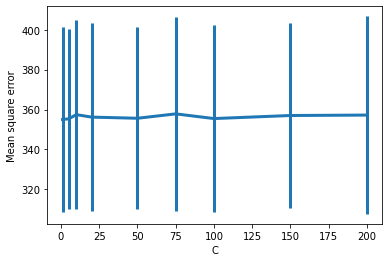

200


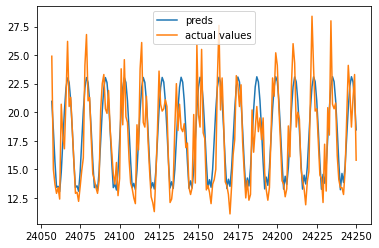

In [13]:
#Ridge Regression
C_range=[1, 5, 10, 20, 50, 75, 100, 150, 200]
MSE=[]
std_error=[]
for C in C_range:
    ridge= Ridge(alpha=1/(2*C))
    kf = KFold(n_splits=5)
    temp=[]
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        ypred = ridge.predict(X[test])
        temp.append(mean_squared_error(y[test],ypred))
    temp=np.array(temp)
    MSE.append(temp.mean())
    std_error.append(temp.std())
MSE=np.array(MSE)
std_error=np.array(std_error)
fig = plt.figure()
plt.errorbar(C_range, MSE, yerr=std_error, linewidth=3)
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.show()
plt.figure()
plt.plot(X[test][:,3], ypred[:,1], label='preds')
plt.plot(X[test][:,3], y[test][:,1], label='actual values')
plt.legend()

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.2007771264011, tolerance: 0.7590609884318766
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2206.4450299303935, tolerance: 1.4452349203084833
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1668.5553775201113, tolerance: 1.141928849614396
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106226.0851748313, tolerance: 297.01672454942235
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1975.3287487641062, tolerance: 1.1862262079589216
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1256.8912211552586, tolerance: 0.3894559152759949
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

0.5562918112489964


C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 721.1357718472701, tolerance: 0.7551763547557842
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2323.8574645398694, tolerance: 1.4905488341902313
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1807.736690939258, tolerance: 1.146980032133676
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1968.9108546740663, tolerance: 1.1862262079589216
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1257.5195799213457, tolerance: 0.3894559152759949
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25850.2796621426, tolerance: 8.66541155327343
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

0.5576217785225712


C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 715.6778718519034, tolerance: 0.7551763547557842
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2318.4108985156245, tolerance: 1.4905488341902313
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1798.2878306706073, tolerance: 1.146980032133676
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25842.05673285797, tolerance: 8.66541155327343
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669.5240003903558, tolerance: 0.7590609884318766
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2194.887168255196, tolerance: 1.4452349203084833
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

0.5590479973970581


C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2318.8339986948, tolerance: 1.4905488341902313
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1799.187411527385, tolerance: 1.146980032133676
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 720.7990678307124, tolerance: 0.8295317480719794
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1254.9722531736031, tolerance: 0.3894559152759949
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25847.78445372651, tolerance: 8.66541155327343
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.1074806021118, tolerance: 0.7590609884318766
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

0.5592374717591371


C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1807.736690939258, tolerance: 1.146980032133676
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 726.3581390123827, tolerance: 0.8295317480719794
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865.9555877069787, tolerance: 0.7199384678663239
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106138.5570825944, tolerance: 297.01672454942235
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1968.9108546740663, tolerance: 1.1862262079589216
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1257.5195799213457, tolerance: 0.3894559152759949
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

0.5576217785225712


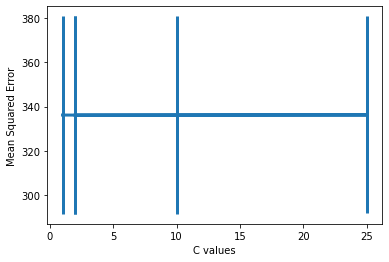

No handles with labels found to put in legend.
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.1074806021118, tolerance: 0.7590609884318766
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2200.14199666954, tolerance: 1.4452349203084833
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1662.0155179700105, tolerance: 1.141928849614396
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24172.005275542746, tolerance: 8.409254685494224
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692.7046634822912, tolerance: 0.7660565288831837
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2152.915431997605, tolerance: 1.499887994865212
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

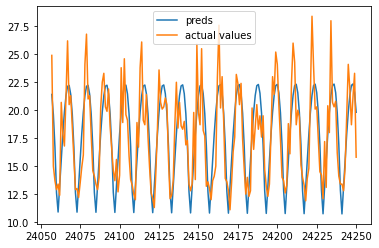

In [23]:
#Lasso regression
from sklearn.linear_model import Lasso
C = [1, 2, 10, 25, 2]
m =[]
s = []
for c in C:
    lasso = Lasso(alpha=1/c)
    k = KFold(n_splits=5)
    t = []
    for tr, te in kf.split(X):
        lasso.fit(X[tr], y[tr])   
        yp = lasso.predict(X[te])
        t.append(mean_squared_error(y[te], yp))
    t = np.array(t)
    m.append(t.mean())
    s.append(t.std())
    print(lasso.score(X[te], y[te]))
plt.errorbar(C, m, yerr=s, linewidth=3)
plt.xlabel('C values')
plt.ylabel('Mean Squared Error')
plt.show()
#plt.plot(X[te][:,3], yp[:,1], label='preds')
#plt.plot(X[te][:,3], y[te][:,1], label='actual values')
plt.legend()

#Lasso Cross-Validated
k = KFold(n_splits=5)
for tr, te in kf.split(X):
        lasso.fit(X[tr], y[tr])   
        yp = lasso.predict(X[te])
plt.plot(X[te][:,3], yp[:,1], label='preds')
plt.plot(X[te][:,3], y[te][:,1], label='actual values')
plt.legend()


    

   
    